In [1]:
import pandas as pd
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import wordnet as wn

import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


#load the Data
Data_pos = pd.read_csv('yes.csv')
Data_neg = pd.read_csv('no.csv')

Neg = Data_neg[0:262] # extraire 262 observations non-INm pour avoir 1 équilibre 
Pos = Data_pos[['text','response']]


Neg = Neg[['text','response']]
Neg['response'].replace({2: 0}, inplace=True) # remplacer la valeur dcu champ respone =2 par 0

Data = pd.concat([Pos, Neg])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
Data = Data.reset_index(drop=True)

#tokenization
Data['Split'] = [word_tokenize(text) for text in Data['text']]

#lemmatisation
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, text in enumerate(Data['Split']):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(text):
    word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
    Final_words.append(word_Final)
  Data.loc[index, 'Tokens'] = str(Final_words)

from sklearn import model_selection
from sklearn.model_selection import train_test_split
# Données D'apprentissage & Test
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Data['Tokens'],Data['response'],test_size=0.3, random_state=42, shuffle=True)


#                                   Vectorization
punctuations = string.punctuation
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#Charger les :  English tokenizer + tagger + parser + NER + word vectors
parser = English()

#fonctionn de Tokenization
def spacy_tokenizer(sentence):
  mytokens = parser(sentence) #token object

  # Lemmatizing each token and converting each token into lowercase if still we have uppercase, cuz don't have idea of the corpus
  mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
  mytokens = [ word for word in mytokens if word not in punctuations ]
  return 
  


In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    #print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

In [0]:
X_train,X_test = TFIDF(Train_X, Test_X)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 25780     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 25,785
Trainable params: 25,785
Non-trainable params: 0
_________________________________________________________________
Train on 366 samples, validate on 158 samples
Epoch 1/10
366/366 [==============================] - 0s 1ms/sample - loss: 0.6910 - acc: 0.5082 - val_loss: 0.6883 - val_acc: 0.4684
Epoch 2/10
366/366 [==============================] - 0s 162us/sample - loss: 0.6788 - acc: 0.5273 - val_loss: 0.6795 - val_acc: 0.5000
Epoch 3/10
366/366 [===

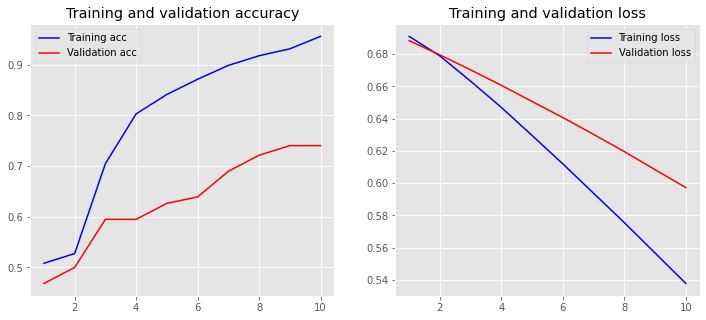

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

from tensorflow.python.keras.layers import Dropout,Dense
from tensorflow.python.keras import Sequential
#from keras.layers import  Dropout, Dense
#from keras.models import Sequential
from sklearn.metrics import confusion_matrix
Y_train = Train_Y
Y_test = Test_Y

plt.style.use('ggplot')
epochs= 10
input_dim = X_train.shape[1]  # Number of features
model = Sequential()

node =4 # 


model.add(Dense(node, input_dim=input_dim, activation='relu')) #kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, Y_train,epochs=epochs, verbose=True, validation_data=(X_test, Y_test),batch_size=32)


def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

yhat_classes = model.predict_classes(X_test, verbose=0)  # added 
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


matrix = confusion_matrix(Y_test, yhat_classes) # Added 
print(matrix)


In [6]:
df_yes =Pos
df_no = Neg

df_text_yes=df_yes.loc[:,['text', 'response']]
df_text_no=df_no.loc[:,['text', 'response']]
# récupération des X_yes et y_yes
array = df_text_yes.values
X_yes = array[:,0] 
y_yes = array[:,1]
lengthX_yes=len(y_yes)
print ("Nombre de yes",lengthX_yes)

# récupération des X_no et y_no
array = df_text_no.values
X_no=array[:,0] 
y_no = array[:,1]
print ("Nombre de no en tout",len(y_no))
X_no_short=X_no[0:lengthX_yes]
y_no_short=y_no[0:lengthX_yes]

# concatenation dans X des X_yes et X_no
X=np.concatenate((X_yes, X_no_short))
y=np.concatenate((y_yes, y_no_short))

#transformation des y en entier pour la classification
y=y.astype('int')

#transformation des X en list de string
X=np.array(X).tolist()

vectorizer = vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X)
X = vectors.toarray()

Nombre de yes 262
Nombre de no en tout 262


## K Fold

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy 
from sklearn import metrics
from scipy.stats import zscore

seed=7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
fold = 0
for train, test in kfold.split(X):
  fold+=1
  print(f"Fold #{fold}")
        
  x_train = X[train]
  y_train = y[train]
  x_test = X[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(4, input_dim= X.shape[1], activation='relu')) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
  
  model.fit(x_train,y_train, epochs=10, batch_size=32, verbose= True)
  
  scores = model.evaluate(x_test,y_test, verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))




Fold #1








Epoch 1/10





471/471 [==============================] - 0s 634us/step - loss: 0.6910 - acc: 0.5924
Epoch 2/10
471/471 [==============================] - 0s 115us/step - loss: 0.6739 - acc: 0.8832
Epoch 3/10
471/471 [==============================] - 0s 120us/step - loss: 0.6498 - acc: 0.9490
Epoch 4/10
471/471 [==============================] - 0s 114us/step - loss: 0.6237 - acc: 0.9639
Epoch 5/10
471/471 [==============================] - 0s 136us/step - loss: 0.5970 - acc: 0.9766
Epoch 6/10
471/471 [==============================] - 0s 119us/step - loss: 0.5703 - acc: 0.9809
Epoch 7/10
471/471 [==============================] - 0s 116us/step - loss: 0.5429 - acc: 0.9830
Epoch 8/10
471/471 [==============================] - 0s 125us/step - loss: 0.5159 - acc: 0.9830
Epoch 9/10
471/471 [==============================] - 0s 119us/step - loss: 0.4893 - acc: 0.9851
Epoch 10/10
471/471 [==============================] - 0s 118us/step - loss: 0.4628 - acc: 0.9894
acc: 88.

### Stratified K fold Cross Validation

In [0]:


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
import numpy 
#from sklearn.model_selection import cross_val_score

seed=7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Dense(4, input_dim= X.shape[1], activation='relu')) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
  model.fit(X[train], y[train], epochs=10, batch_size=32, verbose= True)
  scores = model.evaluate(X[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


Epoch 1/10
471/471 [==============================] - 1s 2ms/step - loss: 0.6911 - acc: 0.6178
Epoch 2/10
471/471 [==============================] - 0s 131us/step - loss: 0.6730 - acc: 0.8790
Epoch 3/10
471/471 [==============================] - 0s 156us/step - loss: 0.6492 - acc: 0.9066
Epoch 4/10
471/471 [==============================] - 0s 142us/step - loss: 0.6239 - acc: 0.9406
Epoch 5/10
471/471 [==============================] - 0s 118us/step - loss: 0.5985 - acc: 0.9554
Epoch 6/10
471/471 [==============================] - 0s 131us/step - loss: 0.5726 - acc: 0.9639
Epoch 7/10
471/471 [==============================] - 0s 126us/step - loss: 0.5468 - acc: 0.9703
Epoch 8/10
471/471 [==============================] - 0s 138us/step - loss: 0.5212 - acc: 0.9745
Epoch 9/10
471/471 [==============================] - 0s 139us/step - loss: 0.4960 - acc: 0.9745
Epoch 10/10
471/471 [==============================] - 0s 150us/step - loss: 0.4707 - acc: 0.9745
acc: 86.79%
Epoch 1/10
471/471 